<a href="https://colab.research.google.com/github/BGDNick/trash/blob/main/Trash.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset download

In [ ]:
!pip -q install gdown

In [11]:
import gdown

file_url = 'https://drive.google.com/file/d/1vaNoscxcZOlbrK4LGTzJfZRYcd4fq9lD/view?usp=sharing'
file_id = file_url.split('/')[-2]
output_file = 'dataset.zip'  # Specify the name of the output file
gdown.download(f'https://drive.google.com/uc?id={file_id}', output_file)

Downloading...
From: https://drive.google.com/uc?id=1vaNoscxcZOlbrK4LGTzJfZRYcd4fq9lD
To: /content/dataset.zip
100%|██████████| 69.3M/69.3M [00:00<00:00, 183MB/s]


'dataset.zip'

In [12]:
!unzip -q dataset.zip

# YOLO 

In [ ]:
!pip -q install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.4/589.4 kB 24.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 206.5/206.5 kB 24.8 MB/s eta 0:00:00


In [ ]:
import cv2
import numpy as np
from ultralytics import YOLO

In [ ]:
model = YOLO()

100%|██████████| 6.23M/6.23M [00:00<00:00, 56.4MB/s]


In [ ]:
!ls custom_dataset

custom_data.yaml  test	train  valid


In [ ]:
model.train(data='custom_dataset/custom_data.yaml', epochs=50, workers=1, imgsz=1280)

Ultralytics YOLOv8.0.106 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=custom_dataset/custom_data.yaml, epochs=50, patience=50, batch=16, imgsz=1280, save=True, save_period=-1, cache=False, device=None, workers=1, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=False,

# Model Performance

In [ ]:
from IPython.display import Image

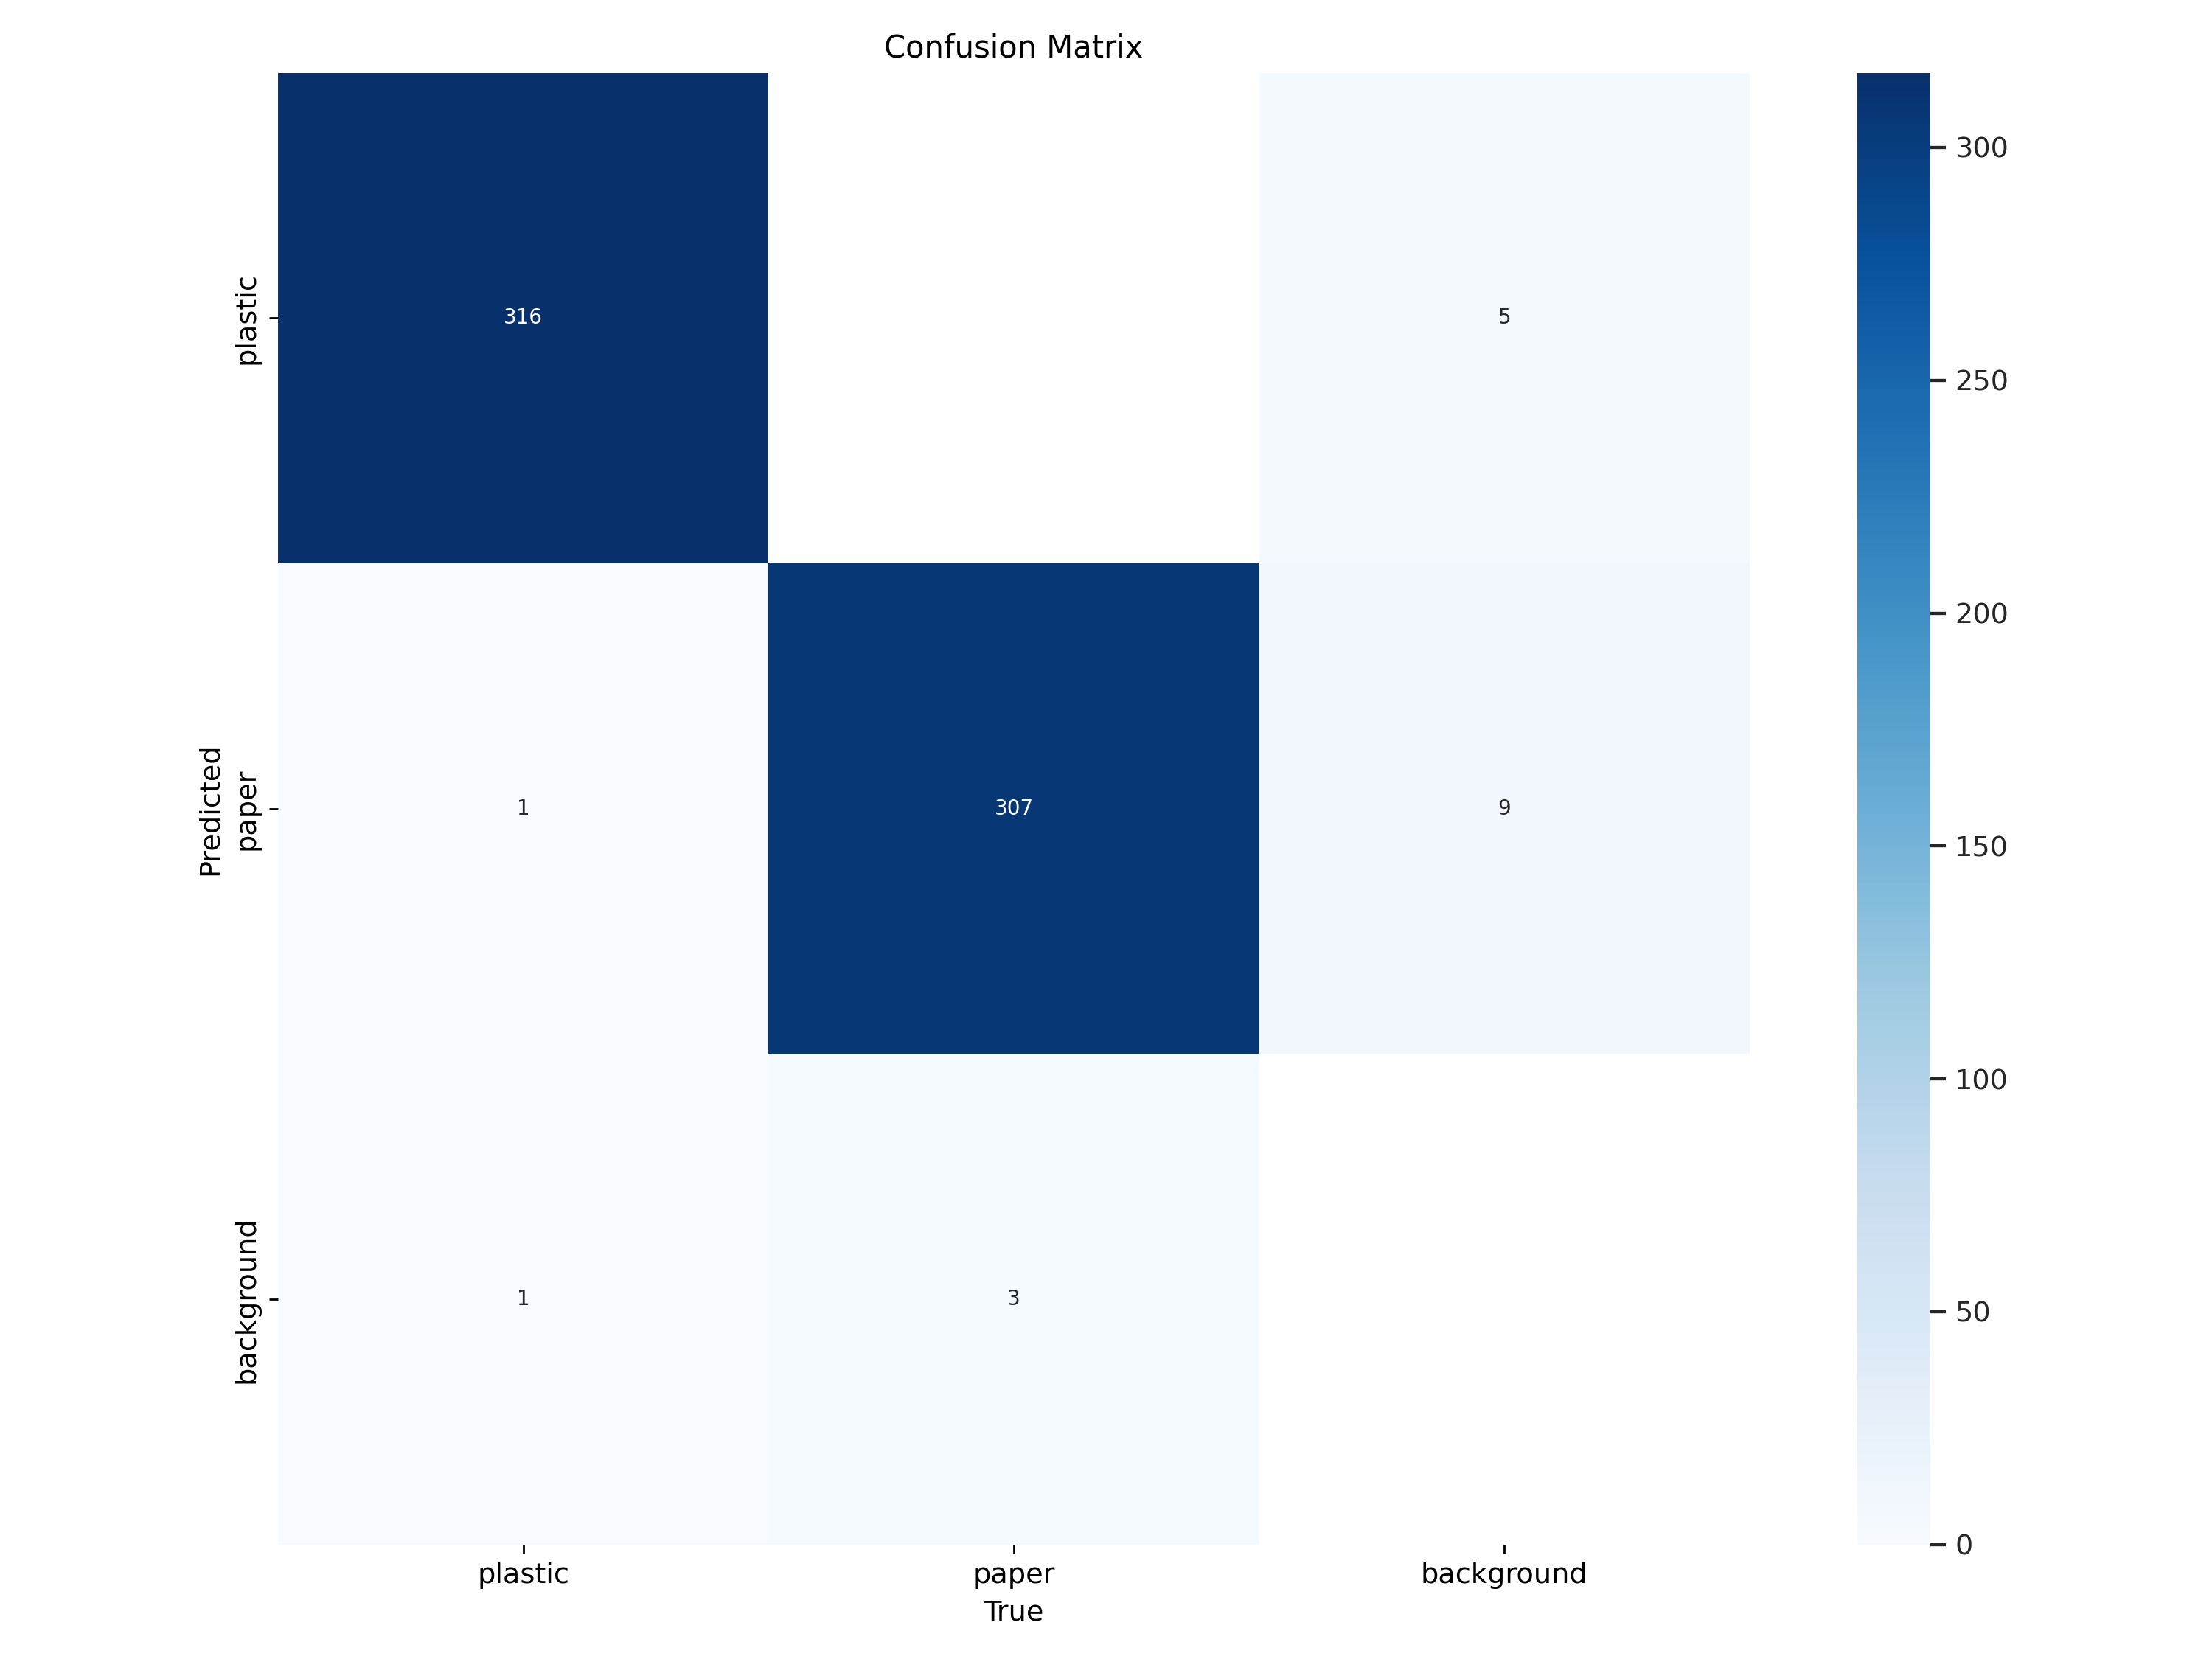

In [ ]:
Image(filename='runs/detect/train2/confusion_matrix.png', width=600)

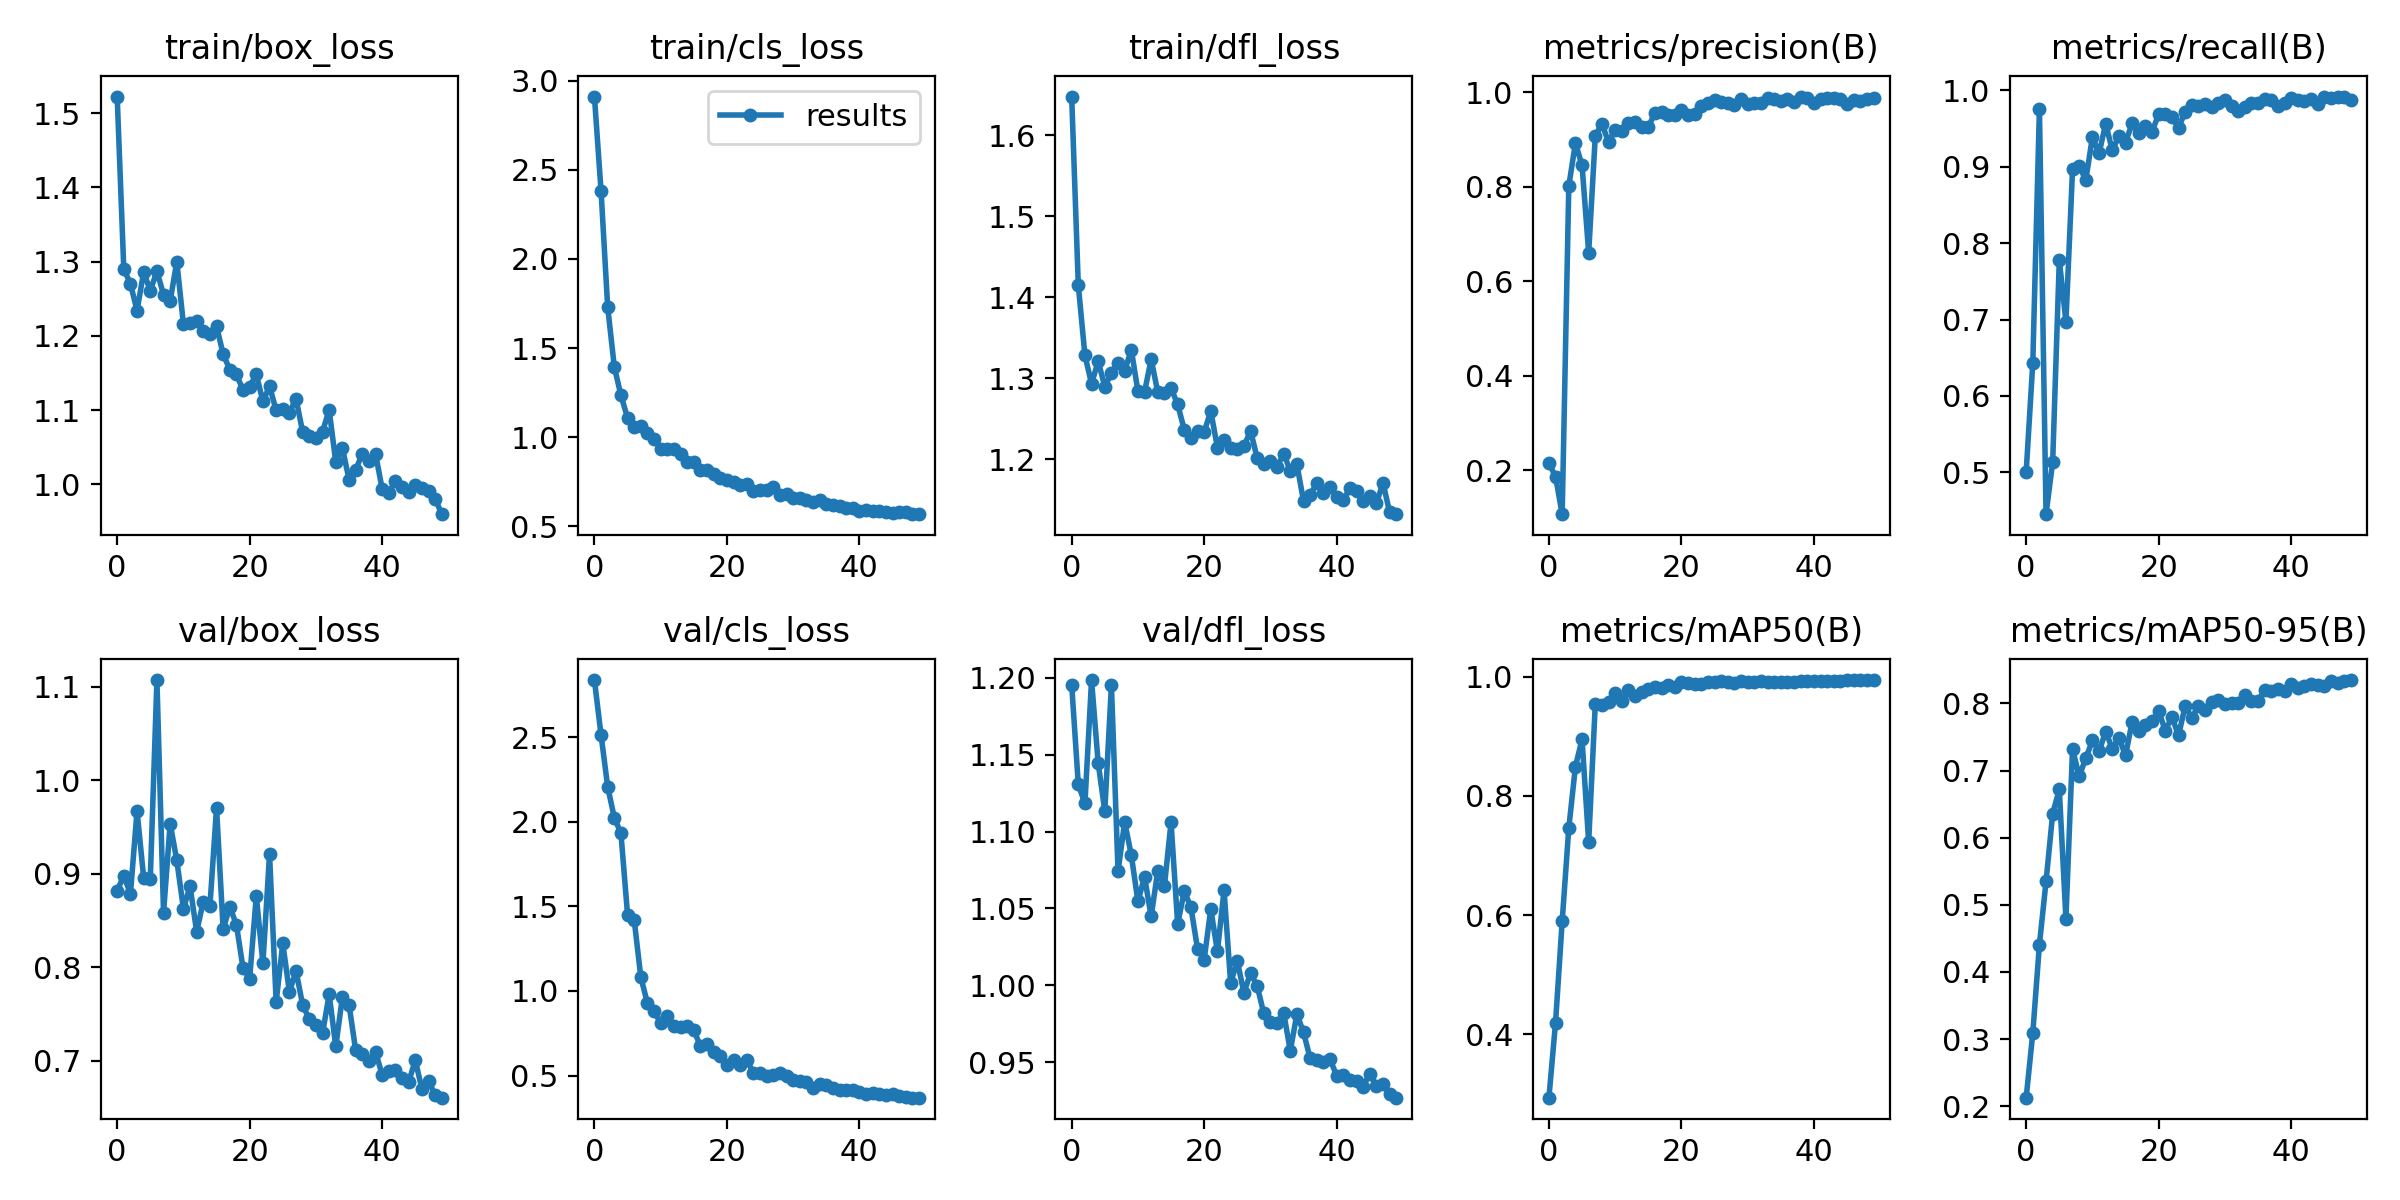

In [ ]:
Image(filename='runs/detect/train2/results.png', width=1200)

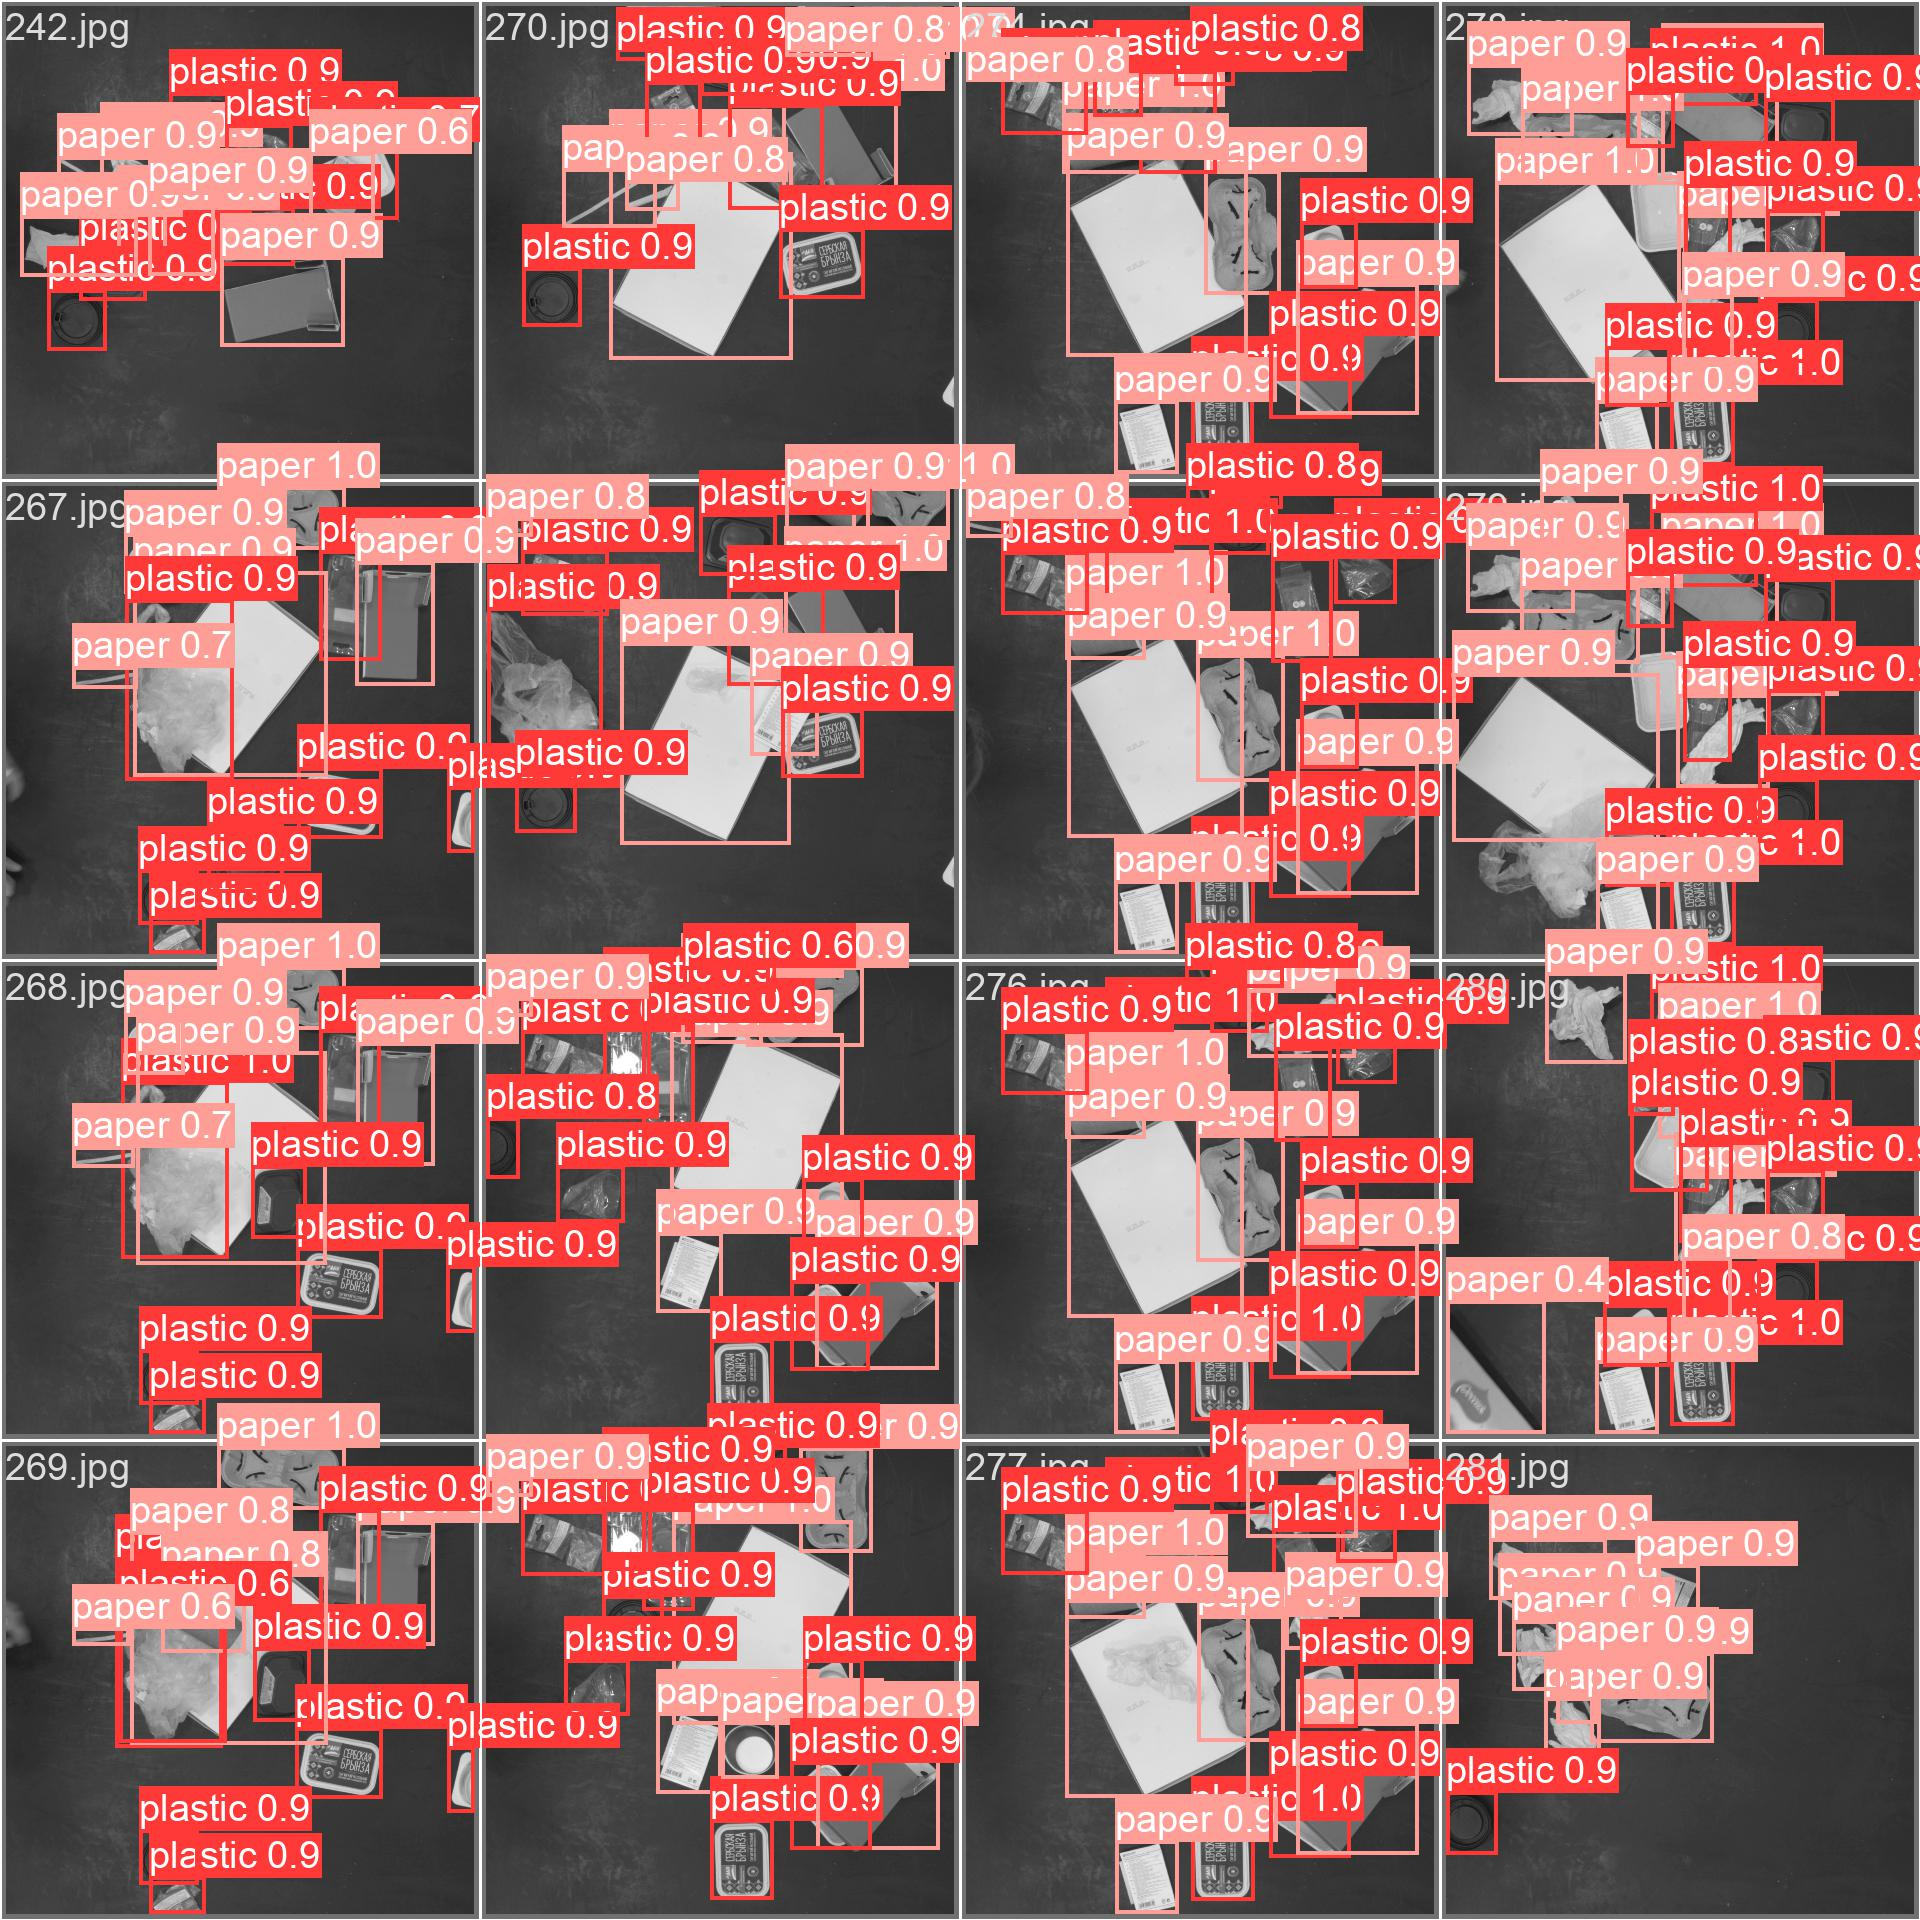

In [ ]:
Image(filename='runs/detect/train2/val_batch0_pred.jpg', width=1200)

# Download Pretrained model

In [ ]:
import gdown

file_url = 'https://drive.google.com/file/d/1_TdqwbHCOnQcwfaKbR4tjyE_L3hVt1MA/view?usp=sharing'
file_id = file_url.split('/')[-2]
output_file = 'model.pt'  # Specify the name of the output file
gdown.download(f'https://drive.google.com/uc?id={file_id}', output_file)

Downloading...
From: https://drive.google.com/uc?id=1_TdqwbHCOnQcwfaKbR4tjyE_L3hVt1MA
To: /content/model.pt
100%|██████████| 6.40M/6.40M [00:00<00:00, 56.6MB/s]


'model.pt'

In [21]:
model = YOLO('./model.pt')

In [19]:
%%time
base_dir = './custom_dataset/test/images/'
imgs = os.listdir(base_dir)
for img in imgs:
    model.predict(base_dir + img)


image 1/1 /content/custom_dataset/test/images/206.jpg: 1280x1280 5 papers, 19.4ms
Speed: 9.0ms preprocess, 19.4ms inference, 1.6ms postprocess per image at shape (1, 3, 1280, 1280)

image 1/1 /content/custom_dataset/test/images/207.jpg: 1280x1280 1 plastic, 7 papers, 19.4ms
Speed: 8.2ms preprocess, 19.4ms inference, 1.6ms postprocess per image at shape (1, 3, 1280, 1280)

image 1/1 /content/custom_dataset/test/images/197.jpg: 1280x1280 4 plastics, 2 papers, 19.4ms
Speed: 9.2ms preprocess, 19.4ms inference, 1.6ms postprocess per image at shape (1, 3, 1280, 1280)

image 1/1 /content/custom_dataset/test/images/217.jpg: 1280x1280 1 plastic, 12 papers, 19.4ms
Speed: 11.7ms preprocess, 19.4ms inference, 1.5ms postprocess per image at shape (1, 3, 1280, 1280)

image 1/1 /content/custom_dataset/test/images/223.jpg: 1280x1280 1 plastic, 12 papers, 19.5ms
Speed: 8.2ms preprocess, 19.5ms inference, 1.6ms postprocess per image at shape (1, 3, 1280, 1280)

image 1/1 /content/custom_dataset/test/im

CPU times: user 2.56 s, sys: 60.3 ms, total: 2.62 s
Wall time: 2.72 s


In [23]:
print(f'time per image {2.62 / len(imgs):.3f} sec')

time per image 0.052 sec
